In [1]:
import xarray as xr

import cartopy.crs as ccrs

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import numpy as np
import xarray as xr
import copy

from WD.plotting import plot_map, add_label_to_axes

In [2]:
# usually this would go on top of the notebook:
plt.rcParams.update({'font.size': 8})  # sets font size for all cells
plt.rcParams['figure.dpi'] = 300  # sets dpi for all cells

alphabet_letters = np.array(list(map(chr, range(65, 91))))  # used for labelling subplots
textwidth = 144  # in mm
mm_to_inch = 0.0393701
textwidth = textwidth * mm_to_inch # textwidth in inches

In [3]:
ds = xr.open_mfdataset("/data/compoundx/WeatherBench/constants/constants_2.8125deg.nc")

In [4]:
"level" in ds[["orography",]].coords

False

In [5]:
# do configurations for plotting - these can also be shared or "inherited" for plots that are similar!

config = {
    "CMAP": "RdBu",
    "NORM": matplotlib.colors.Normalize(vmin=-2, vmax=2),
    "RASTERIZED": True, # don't plot map pixels as individual points to make created files smaller
    "SHOW_COLORBAR": False,
    "CBAR_ORIENTATION": "horizontal",
    "CBAR_EXTEND": "both",
    "SHOW_COLORBAR_LABEL": False,
    "CBAR_LABEL": "Geopotential",
    "TITLE_FONTSIZE": 8,
    "PROJECTION": ccrs.Robinson(), # this is not called by plot_map, but by the function we create the entire plot with.
    "ASPECT_RATIO": 9/5  # can be used to calculate a figsize that looks nice for a given type of plot
}



vars_configs = {}

vars_configs["orography"] = copy.deepcopy(config)
vars_configs["lsm"] = copy.deepcopy(config)
vars_configs["lat2d"] = copy.deepcopy(config)
vars_configs["lon2d"] = copy.deepcopy(config)
vars_configs["slt"] = copy.deepcopy(config)

colors_undersea = plt.cm.terrain(np.linspace(0, 0.17, 256))
colors_land = plt.cm.terrain(np.linspace(0.25, 1, 256))
all_colors = np.vstack((colors_undersea, colors_land))

vars_configs["orography"]["CMAP"] = matplotlib.colors.LinearSegmentedColormap.from_list('terrain_map', all_colors)
vars_configs["orography"]["NORM"] = matplotlib.colors.TwoSlopeNorm(vmin=-500., vcenter=10, vmax=4000)

vars_configs["lsm"]["CMAP"] = "BrBG"
vars_configs["lsm"]["NORM"] = matplotlib.colors.Normalize(-0.5,1.5)

vars_configs["lat2d"]["CMAP"] = "viridis"
vars_configs["lat2d"]["NORM"] = matplotlib.colors.Normalize(-90,90)

vars_configs["lon2d"]["CMAP"] = "viridis"
vars_configs["lon2d"]["NORM"] = matplotlib.colors.Normalize(0,360)


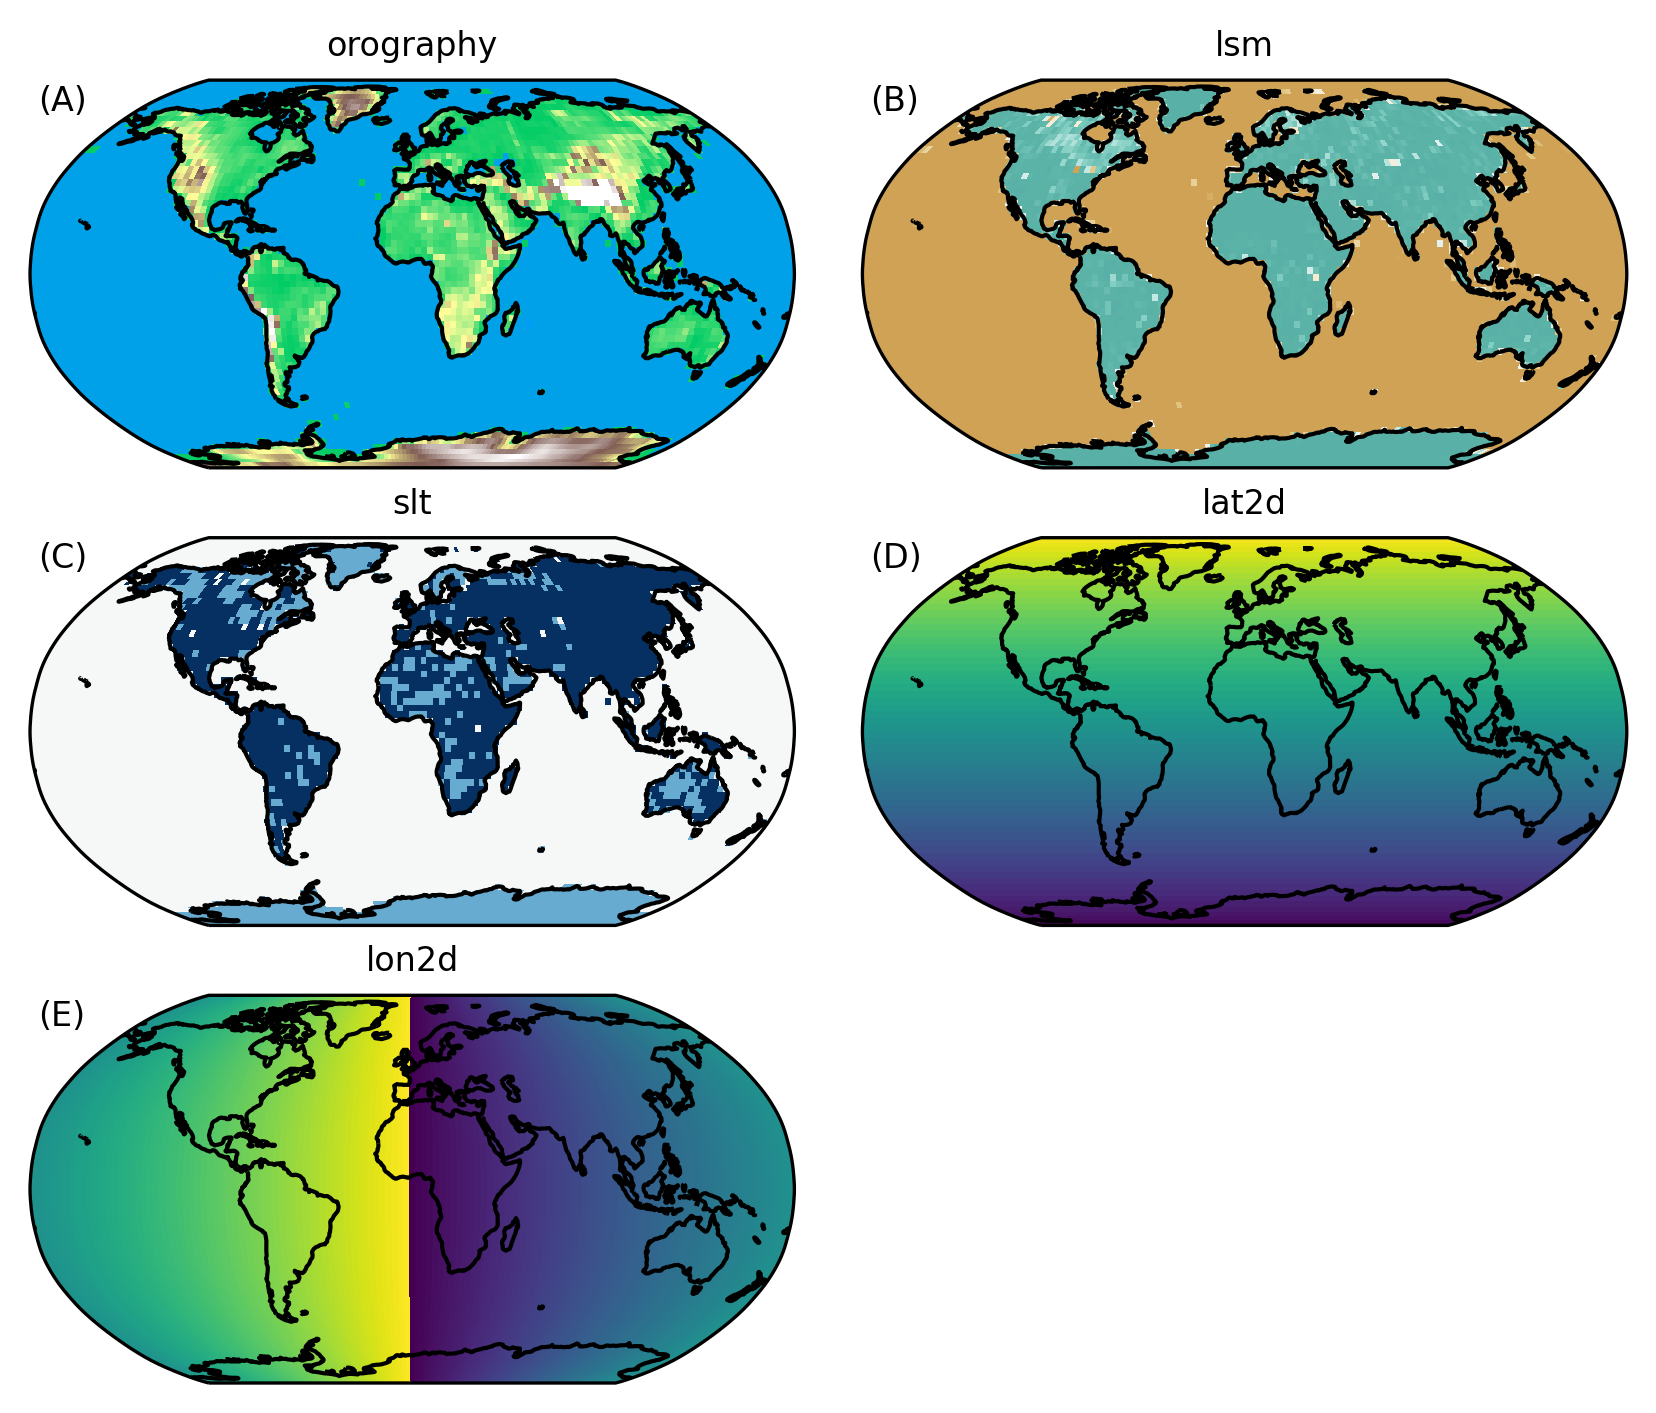

In [6]:
n_rows=3
n_cols=2

figure_width = textwidth
# calculate height from number of rows, cols and aspect ratio (+ do some fine tuning)
figure_height = textwidth * (n_rows / n_cols) / config["ASPECT_RATIO"]

fig = plt.figure(figsize = [figure_width, figure_height])
gs = gridspec.GridSpec(n_rows, n_cols, figure=fig, width_ratios=[1,1])

for i, var in enumerate(list(ds.var())):
    ax = fig.add_subplot(gs[i//2,i%2], projection=vars_configs[var]["PROJECTION"])
    # plot the map:
    plot_map(ax, data=ds[[var,]], plotting_config=vars_configs[var], title=var)
    # add a lael to the panel of the plot:
    add_label_to_axes(ax, "({})".format(alphabet_letters[i]))

fig.canvas.draw()
fig.tight_layout()

plt.show()